In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images = train_images / 255
test_images = test_images / 255

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170508288/170498071 [==============================] - 478s 3us/step


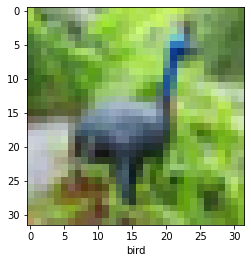

In [14]:
IMG_INDEX = 6
plt.imshow(train_images[IMG_INDEX], cmap= plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape= (32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3),activation='relu'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [18]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation= 'relu'))
model.add(layers.Dense(10))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [20]:
model.compile(optimizer= 'adam',loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True), metrics = ['accuracy'])

history = model.fit(train_images, train_labels, epochs = 10, validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.5496 - accuracy: 0.4328 - val_loss: 1.2878 - val_accuracy: 0.5275
Epoch 2/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1947 - accuracy: 0.5714 - val_loss: 1.1479 - val_accuracy: 0.5919
Epoch 3/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0457 - accuracy: 0.6304 - val_loss: 1.0203 - val_accuracy: 0.6369
Epoch 4/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9527 - accuracy: 0.6634 - val_loss: 0.9633 - val_accuracy: 0.6620
Epoch 5/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8835 - accuracy: 0.6908 - val_loss: 0.9480 - val_accuracy: 0.6683
Epoch 6/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8296 - accuracy: 0.7066 - val_loss: 0.9502 - val_accuracy: 0.6710
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7818 - accuracy: 0.7249 - val_loss: 0.8950 -

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

313/313 - 3s - loss: 0.8812 - accuracy: 0.7028 - 3s/epoch - 8ms/step


In [23]:
predictions = model.predict(test_images)
predictions

array([[-0.2547883 , -3.424798  , -0.39382893, ..., -3.2490175 ,
         1.9399923 ,  0.23971969],
       [ 9.16974   , 11.654795  , -2.5924327 , ..., -7.4899955 ,
        13.739557  ,  7.9914627 ],
       [ 4.320219  ,  2.2013173 , -0.523682  , ..., -4.766615  ,
         4.366269  ,  2.4843657 ],
       ...,
       [-2.4268959 , -7.8287773 ,  1.1688    , ...,  4.239336  ,
        -3.419293  , -4.705672  ],
       [ 1.1190891 ,  5.1767797 , -0.32215005, ..., -0.03647481,
        -3.5494194 ,  0.1949889 ],
       [-2.2949393 , -3.7404864 ,  1.5886964 , ..., 13.853019  ,
        -5.0318456 , -0.969242  ]], dtype=float32)

ship


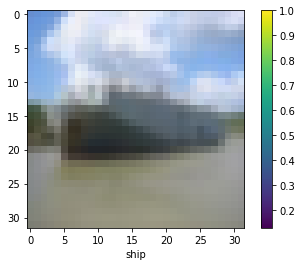

In [53]:
x = 124
plt.figure()
plt.imshow(test_images[x])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[np.argmax(predictions[x])])
print(class_names[test_labels.tolist()[x][0]])
plt.show()